# Kaggle Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits_train = pd.read_csv('../datasets/digits Kaggle/train.csv')
digits_test = pd.read_csv('../datasets/digits Kaggle/test.csv')

In [3]:
digits_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digits_train.shape, digits_test.shape

((42000, 785), (28000, 784))

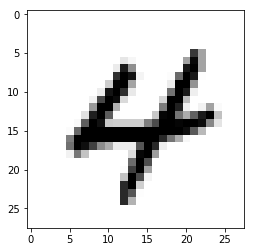

In [6]:
# Display digit 1111
plt.imshow(digits_train.iloc[1111, 1:].values.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [7]:
# Display label of digit 1111
digits_train.iloc[1111, 0]

4

In [8]:
y = digits_train['label'].values
X = digits_train.drop('label', axis=1).values
X.shape, y.shape

((42000, 784), (42000,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#### Gaussian Naive Bayes

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.57023809523809521

#### K Nearest Neighbors

In [11]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 10)}
grid = GridSearchCV(estimator=knn, param_grid=params, n_jobs=-1)

In [12]:
knn = grid.fit(X_train, y_train)

In [13]:
print('Best train score:', grid.best_score_)
print('Best n_neighbors:', grid.best_estimator_.n_neighbors)

Best train score: 0.959965986395
Best n_neighbors: 1


In [14]:
print('Test score:', knn.score(X_test, y_test))

Test score: 0.963888888889


#### SVC

#### Random Forest

TODO:
- SVM
- Random Forest
- PCA
- ...